# **MNIST classification by various Neural Network models**

In [ ]:
import numpy as np
np.random.seed(1337)

In [ ]:
# Importing standard libraries
import pandas as pd
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.models import Sequential as seq
from keras.layers import Dense as dense
from keras.layers import Dropout
from keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten

In [ ]:
# Loading the data
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [ ]:
# Normalizing the input data by maximum pixel 255
train_x = train_x/255
test_x = test_x/255

In [ ]:
# Flattening the inputs to 2-d
train_input = np.reshape(train_x,(len(train_x), -1))
test_input = np.reshape(test_x,(len(test_x), -1))
print('Train input shape is',np.shape(train_input))
print('Test input shape is',np.shape(test_input))

Train input shape is (60000, 784)
Test input shape is (10000, 784)


In [ ]:
# One hot encoding of the train and test label vectors
train_label= to_categorical(train_y,10)
test_label = to_categorical(test_y,10)
print('Train label shape is',np.shape(train_label))
print('Test label shape is',np.shape(test_label))

Train label shape is (60000, 10)
Test label shape is (10000, 10)


# **Single Layered Neural Network**

In [ ]:
# Building the single-layered Neural Network using keras
nn_keras_model = seq()

# Adding input and one-hidden layer
nn_keras_model.add(dense(128, activation='sigmoid', input_shape=(784,)))

# Adding the output layer
nn_keras_model.add(dense(10, activation='softmax'))

# Choosing the Stochastic gradient optimizer
sgd = SGD(learning_rate=0.1)

# Compiling the created model
nn_keras_model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])


In [ ]:
# Fitting the model for the train data
nn_keras_model.fit(train_input, train_label ,epochs=10, validation_data=(test_input, test_label), verbose=1)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1186 - accuracy: 0.9664 - val_loss: 0.1248 - val_accuracy: 0.9616
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1111 - accuracy: 0.9682 - val_loss: 0.1197 - val_accuracy: 0.9647
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1044 - accuracy: 0.9707 - val_loss: 0.1111 - val_accuracy: 0.9660
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0987 - accuracy: 0.9721 - val_loss: 0.1066 - val_accuracy: 0.9682
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0931 - accuracy: 0.9734 - val_loss: 0.1044 - val_accuracy: 0.9681
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0883 - accuracy: 0.9748 - val_loss: 0.1022 - val_accuracy: 0.9684
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0840 - accuracy: 0.9763 - val_loss: 0.0968 - val_accuracy:

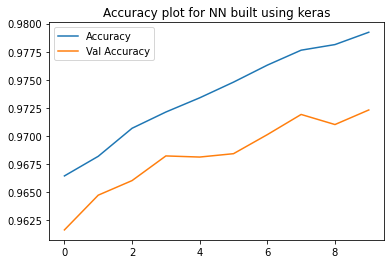

In [ ]:
# Plotting the accuracy of train and validation
accuracy = nn_keras_model.history.history['accuracy']
val_accuracy = nn_keras_model.history.history['val_accuracy']
plt.plot(accuracy, label = 'Accuracy')
plt.plot(val_accuracy, label = 'Val Accuracy')
plt.legend()
plt.title('Accuracy plot for NN built using keras')
plt.show()

In [ ]:
# Evaluating the model
train_loss, train_acc = nn_keras_model.evaluate(train_input,train_label)
print('Train_loss:',train_loss, ';', 'Train Accuracy:', train_acc)
test_loss, test_acc = nn_keras_model.evaluate(test_input,test_label)
print('Test_loss:',test_loss, ';', 'Test Accuracy:', test_acc)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0681 - accuracy: 0.9814
Train_loss: 0.0681229680776596 ; Train Accuracy: 0.9813500046730042
313/313 [==============================] - 0s 1ms/step - loss: 0.0913 - accuracy: 0.9723
Test_loss: 0.09130249917507172 ; Test Accuracy: 0.9722999930381775


# **Inference:**
As observed with previous experiences, the manually created function consumes high time than the library function. Also the accuracy of the library function is high when compared to using a function created from scratch.

# **Effect of ReLu activation layer in NN**

In [ ]:
# Building the single-layered Neural Network using keras for Relu activation 
nn_keras_relu = seq()

# Adding input and one-hidden layer
nn_keras_relu.add(dense(128, activation='relu', input_shape=(784,)))

# Adding the output layer
nn_keras_relu.add(dense(10, activation='softmax'))

# Choosing the Stochastic gradient optimizer
sgd = SGD(learning_rate=0.1)

# Compiling the created model
nn_keras_relu.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])


In [ ]:
# Fitting the model for the train data
nn_keras_relu.fit(train_input, train_label ,epochs=10, validation_data=(test_input, test_label), verbose=1)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4642 - accuracy: 0.8673 - val_loss: 0.1671 - val_accuracy: 0.9501
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1584 - accuracy: 0.9541 - val_loss: 0.1197 - val_accuracy: 0.9637
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1042 - accuracy: 0.9700 - val_loss: 0.1001 - val_accuracy: 0.9690
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0809 - accuracy: 0.9762 - val_loss: 0.0848 - val_accuracy: 0.9733
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0664 - accuracy: 0.9802 - val_loss: 0.0801 - val_accuracy: 0.9758
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0553 - accuracy: 0.9834 - val_loss: 0.0832 - val_accuracy: 0.9741
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0477 - accuracy: 0.9860 - val_loss: 0.0687 - val_accuracy:

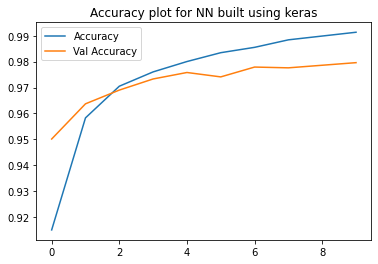

In [ ]:
# Plotting the accuracy of train and validation
accuracy = nn_keras_relu.history.history['accuracy']
val_accuracy = nn_keras_relu.history.history['val_accuracy']
plt.plot(accuracy, label = 'Accuracy')
plt.plot(val_accuracy, label = 'Val Accuracy')
plt.legend()
plt.title('Accuracy plot for NN built using keras')
plt.show()

In [ ]:
# Evaluating the model
train_loss, train_acc = nn_keras_relu.evaluate(train_input,train_label)
print('Train_loss:',train_loss, ';', 'Train Accuracy:', train_acc)
test_loss, test_acc = nn_keras_relu.evaluate(test_input,test_label)
print('Test_loss:',test_loss, ';', 'Test Accuracy:', test_acc)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0243 - accuracy: 0.9944
Train_loss: 0.02432037889957428 ; Train Accuracy: 0.994350016117096
313/313 [==============================] - 0s 1ms/step - loss: 0.0648 - accuracy: 0.9796
Test_loss: 0.06480899453163147 ; Test Accuracy: 0.9796000123023987


# **Inference:**
Using 'ReLU' activation function instead of 'sigmoid', increases both the train accuracy and test accuracy.

# **Impact of regularization and dropouts**

In [ ]:
# Definding the regularization rate and dropout rates
drop_list = [0.2,0.4,0.6,0.8]
regularize_list = [0.001,0.01,0.1,1]

# Creating an summary dataframe to summarize the result of each iteration
summary_df = pd.DataFrame(columns = ["Regularization", "Drop_out", "Train_accuracy", "Val_accuracy"])

# Developing the model for different regularization rate and dropout rate
for drop in drop_list:
  for value in regularize_list:
    nn_keras_drop= seq()

    # Adding input and one-hidden layer 
    nn_keras_drop.add(dense(128, activation='relu', input_shape=(784,),kernel_regularizer=l2(value)))
    # Adding first dropout layer
    nn_keras_drop.add(Dropout(drop))

    # Adding second hidden layer
    nn_keras_drop.add(dense(64, activation='relu',kernel_regularizer=l2(value)))
    # Adding second dropout layer
    nn_keras_drop.add(Dropout(drop))

    # Adding third hidden layer
    nn_keras_drop.add(dense(32, activation='relu',kernel_regularizer=l2(value)))
    # Adding third dropout layer
    nn_keras_drop.add(Dropout(drop))

    # Adding the output layer
    nn_keras_drop.add(dense(10, activation='softmax', kernel_regularizer=l2(value)))

    # Choosing the Stochastic gradient optimizer
    sgd = SGD(learning_rate=0.1)

    # Compiling the created model
    nn_keras_drop.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

    # Fitting the model for the train data
    nn_keras_drop.fit(train_input, train_label ,epochs=10, validation_data=(test_input, test_label), verbose=0)

    # Model evaluation
    train_loss, train_acc = nn_keras_drop.evaluate(train_input,train_label)
    test_loss, test_acc = nn_keras_drop.evaluate(test_input,test_label)

    # Updating the summary dataframe
    summary_df = summary_df.append({'Drop_out':drop,'Regularization':value,'Train_accuracy':train_acc,'Val_accuracy':test_acc},ignore_index = True)

313/313 [==============================] - 0s 1ms/step - loss: 2.3017 - accuracy: 0.1135


In [ ]:
summary_df

,Regularization,Drop_out,Train_accuracy,Val_accuracy
0,0.001,0.2,0.976500,0.9725
1,0.010,0.2,0.911067,0.9108
2,0.100,0.2,0.112367,0.1135
3,1.000,0.2,0.112367,0.1135
4,0.001,0.4,0.959317,0.9556
5,0.010,0.4,0.904033,0.9022
6,0.100,0.4,0.112367,0.1135
7,1.000,0.4,0.112367,0.1135
8,0.001,0.6,0.925650,0.9241
9,0.010,0.6,0.861800,0.8643


In [ ]:
# Finding row with maximum value for both train and test accuracy
row_max =summary_df[(summary_df['Train_accuracy'] == summary_df['Train_accuracy'].max()) & (summary_df['Val_accuracy'] == summary_df['Val_accuracy'].max())]
row_max

,Regularization,Drop_out,Train_accuracy,Val_accuracy
0,0.001,0.2,0.9765,0.9725


In [ ]:
# Building the model for best dropout rate and regularization found above
drop_rate = 0.2
regularization = 0.001

nn_keras_drop= seq()

# Adding input and one-hidden layer 
nn_keras_drop.add(dense(128, activation='relu', input_shape=(784,),kernel_regularizer=l2(regularization)))
# Adding first dropout layer
nn_keras_drop.add(Dropout(drop_rate))

# Adding second hidden layer
nn_keras_drop.add(dense(64, activation='relu',kernel_regularizer=l2(regularization)))
# Adding second dropout layer
nn_keras_drop.add(Dropout(drop_rate))

# Adding third hidden layer
nn_keras_drop.add(dense(32, activation='relu',kernel_regularizer=l2(regularization)))
# Adding third dropout layer
nn_keras_drop.add(Dropout(drop_rate))

# Adding the output layer
nn_keras_drop.add(dense(10, activation='softmax',kernel_regularizer=l2(regularization)))

# Choosing the Stochastic gradient optimizer
sgd = SGD(learning_rate=0.1)

# Compiling the created model
nn_keras_drop.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

# Fitting the model for the train data
nn_keras_drop.fit(train_input, train_label ,epochs=10, validation_data=(test_input, test_label), verbose=1)


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1250 - accuracy: 0.7511 - val_loss: 0.4563 - val_accuracy: 0.9495
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5146 - accuracy: 0.9306 - val_loss: 0.3463 - val_accuracy: 0.9636
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4142 - accuracy: 0.9437 - val_loss: 0.3179 - val_accuracy: 0.9606
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3715 - accuracy: 0.9483 - val_loss: 0.2952 - val_accuracy: 0.9655
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3457 - accuracy: 0.9522 - val_loss: 0.2886 - val_accuracy: 0.9666
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3343 - accuracy: 0.9543 - val_loss: 0.2831 - val_accuracy: 0.9661
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3278 - accuracy: 0.9567 - val_loss: 0.2785 - val_accuracy:

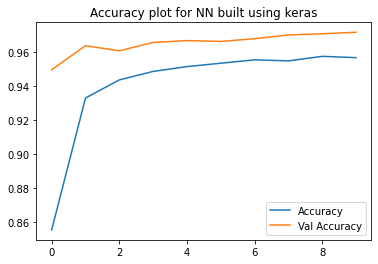

In [ ]:
# Plotting the accuracy of train and validation
accuracy = nn_keras_drop.history.history['accuracy']
val_accuracy = nn_keras_drop.history.history['val_accuracy']
plt.plot(accuracy, label = 'Accuracy')
plt.plot(val_accuracy, label = 'Val Accuracy')
plt.legend()
plt.title('Accuracy plot for NN built using keras')
plt.show()

In [ ]:
# Model evaluation
train_loss, train_acc = nn_keras_drop.evaluate(train_input,train_label)
print('Train_loss:',train_loss, ';', 'Train Accuracy:', train_acc)
test_loss, test_acc = nn_keras_drop.evaluate(test_input,test_label)
print('Test_loss:',test_loss, ';', 'Test Accuracy:', test_acc)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2453 - accuracy: 0.9779
Train_loss: 0.24533690512180328 ; Train Accuracy: 0.9779499769210815
313/313 [==============================] - 1s 2ms/step - loss: 0.2603 - accuracy: 0.9715
Test_loss: 0.26030221581459045 ; Test Accuracy: 0.9714999794960022


# **Convolutional Neural Network**

In [ ]:
# Reshaping the inputs to 3-d
train_input_cnn = np.reshape(train_x,(len(train_x),28,28,1))
test_input_cnn = np.reshape(test_x,(len(test_x), 28,28,1))
print('CNN Train input shape is',np.shape(train_input_cnn))
print('CNN Test input shape is',np.shape(test_input_cnn))

CNN Train input shape is (60000, 28, 28, 1)
CNN Test input shape is (10000, 28, 28, 1)


In [ ]:
# Creating the CNN model
cnn_model = seq()

# Adding the convolutional layer
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Adding the pool layer
cnn_model.add(MaxPool2D(2, 2))

# Flattening before feeding it to hidden layer
cnn_model.add(Flatten())

# Hidden layer with 64 neurons
cnn_model.add(dense(64, activation='relu'))

# Output layer
cnn_model.add(dense(10, activation='softmax'))

# Choosing the Stochastic gradient optimizer
sgd = SGD(learning_rate=0.1)

# Compiling the created model
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])


In [ ]:
# Fitting the model for the train data
cnn_model.fit(train_input_cnn, train_label ,epochs=5, validation_data=(test_input_cnn, test_label), verbose=1)

Epoch 1/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.4419 - accuracy: 0.8609 - val_loss: 0.0891 - val_accuracy: 0.9707
Epoch 2/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0801 - accuracy: 0.9755 - val_loss: 0.0624 - val_accuracy: 0.9791
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0502 - accuracy: 0.9842 - val_loss: 0.0572 - val_accuracy: 0.9802
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0380 - accuracy: 0.9888 - val_loss: 0.0492 - val_accuracy: 0.9839
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0273 - accuracy: 0.9919 - val_loss: 0.0445 - val_accuracy: 0.9848


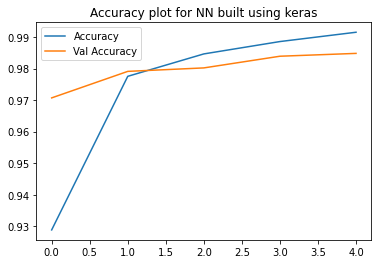

In [ ]:
# Plotting the accuracy of train and validation
accuracy = cnn_model.history.history['accuracy']
val_accuracy = cnn_model.history.history['val_accuracy']
plt.plot(accuracy, label = 'Accuracy')
plt.plot(val_accuracy, label = 'Val Accuracy')
plt.legend()
plt.title('Accuracy plot for NN built using keras')
plt.show()

In [ ]:
# Model evaluation
train_loss, train_acc = cnn_model.evaluate(train_input_cnn,train_label)
print('Train_loss:',train_loss, ';', 'Train Accuracy:', train_acc)
test_loss, test_acc = cnn_model.evaluate(test_input_cnn,test_label)
print('Test_loss:',test_loss, ';', 'Test Accuracy:', test_acc)

1875/1875 [==============================] - 12s 6ms/step - loss: 0.0216 - accuracy: 0.9940
Train_loss: 0.021553490310907364 ; Train Accuracy: 0.9940000176429749
313/313 [==============================] - 2s 6ms/step - loss: 0.0445 - accuracy: 0.9848
Test_loss: 0.04450812563300133 ; Test Accuracy: 0.9847999811172485


# **Inference:**
Compared to early developed Neural Networks, the convolutional neural network is found to give high test accuracy. But, it has high time consumption than other models.

# **Analysis on misclassified MNIST numbers**

In [ ]:
# Finding the index of misclassified numbers in simple NN 
nn_keras_prediction = np.argmax(nn_keras_model.predict(test_input),axis = 1)
keras_misclassified = np.where(nn_keras_prediction!=test_y)

In [ ]:
# Finding the index of misclassified numbers in ReLU NN 
nn_relu_prediction = np.argmax(nn_keras_relu.predict(test_input),axis = 1)
relu_misclassified = np.where(nn_relu_prediction!=test_y)

In [ ]:
# Finding the index of misclassified numbers in Drop-out and Regularized NN 
nn_drop_prediction = np.argmax(nn_keras_drop.predict(test_input),axis = 1)
drop_misclassified = np.where(nn_drop_prediction!=test_y)

In [ ]:
# Finding the index of misclassified numbers in CNN 
cnn_prediction = np.argmax(cnn_model.predict(test_input_cnn),axis = 1)
cnn_misclassified = np.where(cnn_prediction!=test_y)

In [ ]:
# Finding the misclassified numbers common in all the above 4 models
intersect1 = np.intersect1d(keras_misclassified,relu_misclassified)
intersect2 = np.intersect1d(drop_misclassified,cnn_misclassified)
common_misclassified = np.intersect1d(intersect1,intersect2)
print("Index of Mostly misclassified numbers:")
print(common_misclassified)

Index of Mostly misclassified numbers:
[ 321  340  445  582  659  720  965 1014 1112 1226 1242 1260 1393 1522
 1530 1681 1717 1790 2016 2043 2118 2130 2369 2488 2607 2654 2896 3073
 3422 3520 3558 3818 3853 3906 4248 4497 4807 4860 4966 5331 5887 5937
 5955 5972 5973 5982 6597 6651 6783 7434 8094 8408 9009 9019 9024 9634
 9664 9679 9729 9770]


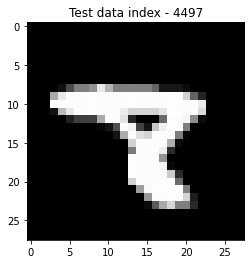

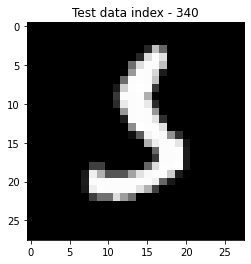

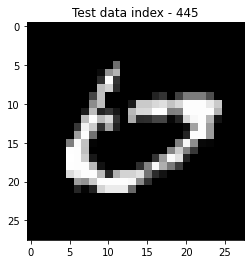

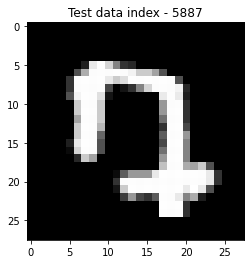

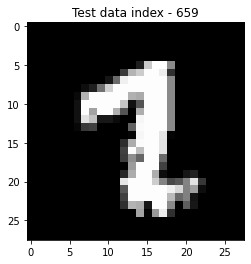

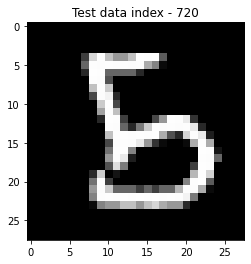

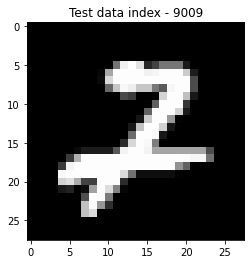

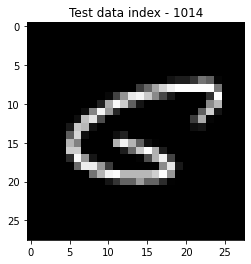

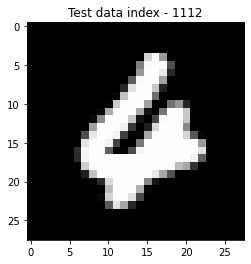

In [ ]:
# Randomly plotting 9 images
random_indices = [4497,340,445,5887,659,720,9009,1014,1112]
for index in random_indices:
  plt.figure()
  plt.imshow(test_x[index],cmap='gray')
  plt.title('Test data index - {}'.format(index))
  plt.show()

# **Inference:**
Some of the images can be classified by me. There are two reasons for which some images cannot be classified:
1. Lack of image clarity.
2. Some numbers are rotated to different angles. Some numbers are written in different styles. This makes these images to stand unqiue from the regular representation of numbers. 

Hence, the neural network was not able to correctly classify these kind of images.

# **Reference:**
1. https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
2. https://www.datacamp.com/community/tutorials/deep-learning-python
3. https://www.tensorflow.org/tutorials/images/cnn
